In [3]:
import os

base_path = r"D:\code\1SU25-DPL\PRJ-weapons_detection\Datasets_weapons"  # Ví dụ: "D:/code/1SU25-DPL/PRJ_bla/agri_data"

def count_images_and_labels(split):
    img_dir = os.path.join(base_path, split, "images")
    lbl_dir = os.path.join(base_path, split, "labels")
    
    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])
    lbl_files = sorted([f for f in os.listdir(lbl_dir) if f.endswith('.txt')])
    
    img_basenames = set(os.path.splitext(f)[0] for f in img_files)
    lbl_basenames = set(os.path.splitext(f)[0] for f in lbl_files)
    
    no_label = img_basenames - lbl_basenames
    label_not_exist = lbl_basenames - img_basenames

    print(f"--- {split.upper()} ---")
    print(f"Số ảnh: {len(img_files)}")
    print(f"Số nhãn: {len(lbl_files)}")
    print(f"Số ảnh không có label: {len(no_label)}")
    if no_label:
        print("-> Danh sách ảnh không có txt label:", list(no_label)[:5])
    print(f"Số label không khớp ảnh: {len(label_not_exist)}\n")

for split in ["train", "valid", "test"]:
    count_images_and_labels(split)


--- TRAIN ---
Số ảnh: 12434
Số nhãn: 12434
Số ảnh không có label: 0
Số label không khớp ảnh: 0

--- VALID ---
Số ảnh: 529
Số nhãn: 529
Số ảnh không có label: 0
Số label không khớp ảnh: 0

--- TEST ---
Số ảnh: 97
Số nhãn: 97
Số ảnh không có label: 0
Số label không khớp ảnh: 0



# Ví dụ về 4 bức ảnh với 3 nhãn và không nhãn

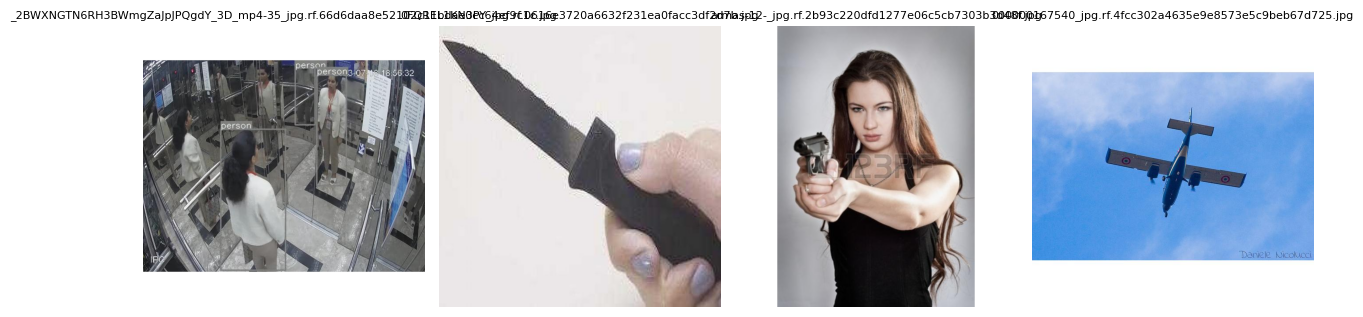

In [29]:
import matplotlib.pyplot as plt
import cv2
import os

# === Nhập danh sách ảnh cần xem ===
image_paths = [
    r"D:\code\1SU25-DPL\PRJ-weapons_detection\Datasets_weapons\train\images\_2BWXNGTN6RH3BWmgZaJpJPQgdY_3D_mp4-35_jpg.rf.66d6daa8e52102c11bdae0cc64ef9c1c.jpg",
    r"D:\code\1SU25-DPL\PRJ-weapons_detection\Datasets_weapons\train\images\0FQREL1KN3PY_jpg.rf.0616e3720a6632f231ea0facc3df2d7b.jpg",
    r"D:\code\1SU25-DPL\PRJ-weapons_detection\Datasets_weapons\train\images\armas-12-_jpg.rf.2b93c220dfd1277e06c5cb7303b3d48f.jpg",
    r"D:\code\1SU25-DPL\PRJ-weapons_detection\Datasets_weapons\train\images\000000167540_jpg.rf.4fcc302a4635e9e8573e5c9beb67d725.jpg"
]

plt.figure(figsize=(12, 6))

for idx, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Không thể đọc ảnh: {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 4, idx + 1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path), fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


# Bounding box

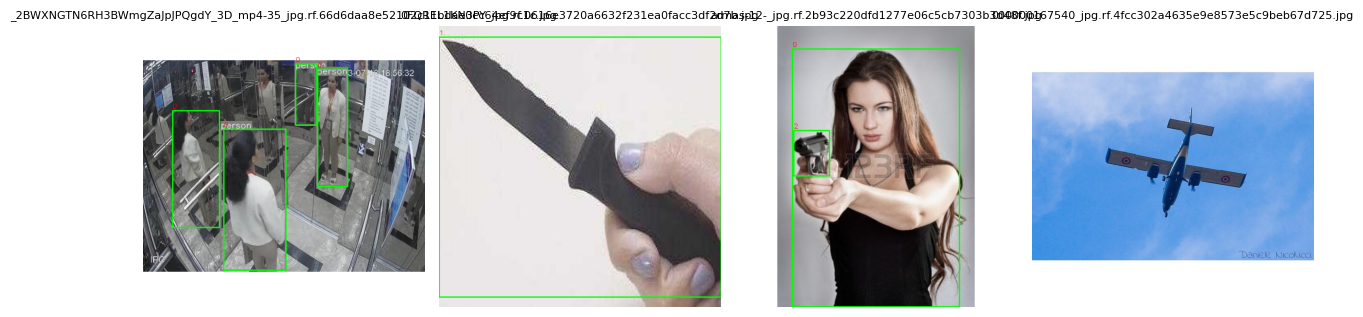

In [28]:
import matplotlib.pyplot as plt
import cv2
import os

def draw_yolo_box(image, label_path):
    h, w, _ = image.shape
    if not os.path.exists(label_path):
        return image
    with open(label_path, 'r') as f:
        for line in f:
            if line.strip() == "":
                continue
            cls, x, y, bw, bh = map(float, line.strip().split())
            cx, cy, bw, bh = x * w, y * h, bw * w, bh * h
            x1, y1 = int(cx - bw / 2), int(cy - bh / 2)
            x2, y2 = int(cx + bw / 2), int(cy + bh / 2)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, str(int(cls)), (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    return image

# === Nhập danh sách ảnh cần xem ===
image_paths = [
    r"D:\code\1SU25-DPL\PRJ-weapons_detection\Datasets_weapons\train\images\_2BWXNGTN6RH3BWmgZaJpJPQgdY_3D_mp4-35_jpg.rf.66d6daa8e52102c11bdae0cc64ef9c1c.jpg",
    r"D:\code\1SU25-DPL\PRJ-weapons_detection\Datasets_weapons\train\images\0FQREL1KN3PY_jpg.rf.0616e3720a6632f231ea0facc3df2d7b.jpg",
    r"D:\code\1SU25-DPL\PRJ-weapons_detection\Datasets_weapons\train\images\armas-12-_jpg.rf.2b93c220dfd1277e06c5cb7303b3d48f.jpg",
    r"D:\code\1SU25-DPL\PRJ-weapons_detection\Datasets_weapons\train\images\000000167540_jpg.rf.4fcc302a4635e9e8573e5c9beb67d725.jpg"
]

plt.figure(figsize=(12, 6))

for idx, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Tạo đường dẫn label từ đường dẫn ảnh
    label_path = img_path.replace("images", "labels").replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt')
    img = draw_yolo_box(img, label_path)

    plt.subplot(1, 4, idx + 1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path), fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()
